# Introduction to K-Nearest Neighbors and HyperParameter Search

## K-Nearest Neighbors for Classification

Like the K-Means algorithm we covered before this, K-Nearest Neighbors is an example of **lazy learning** in machine learning.  Neither K-means of K-nearest neighbors are generalizable outside of their input data. In order to get usage out of these algorithms, we need to have access to the entire set of training data, even as we try and use our model to make predictions on new data.  This can pose some difficulties when you're dealing with a lot of data...imagine if you have millions of existing data points to test for!

We contrast this to eager learning, which is exhibited by all tree based algorithms, support vector machines, or logistic regressions (among many others). Once we have trained an eager model, we can export it as a generalizable function without bringing all of our training data within. 

That K-Nearest neighbors is a *lazy* model shouldn't be a surprise.  K-NN makes predictions by comparing the new input data to existing points and their labels. Points are predicted based on which points in the training data they are most simialar to.  It is extremely powerful and modifications of it (such as approximate nearest neighbors) power a lot of huge apps like Spotify or Better.

In this notebook, we'll be hand coding an implementation of the K-nearest neighbors algorithm as well as comparing it to some other algorithms with regards to classification power on a test set of data.

### Writing the KNN Classification Function First

We are loading the famous Iris dataset to test our KNN's ability to classify flower samples based on their similarity to other flowers.

In [2]:
#Loading Necessary Background Packages
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Importing Data for classification 
iris = datasets.load_iris()
X = iris.data 
y = iris.target

The iris dataset has data in 4 dimensions

In [3]:
## Sampling the data
X[:6]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4]])

There are 3 iris classifications we are predicting.

In [4]:
np.unique(y)

array([0, 1, 2])

We'll be splitting the data into Test and Train splits using the super handy built in sklearn function.

I've chosen to split the data into 80% train, 20% test.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

Below I have printed the length of the train and test datasets.

In [11]:
print X_train.shape, X_test.shape

(120, 4) (30, 4)


I've plotted the first 2 features of the training datasets to get a sense of how well clustered the points are.  Seems that even with 2 features, our data is very well segmented already.  I can see our model doing very well here.

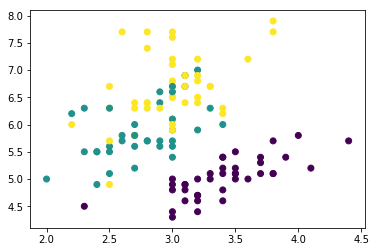

In [13]:
plt.scatter(X_train[:,1], X_train[:,0], c=y_train)

The below K-NN classification takes the following arguments:

- X_train: Features to build model on
- y_train: Labels for training model
- X_test: Features to predict on

The model outputs the following

- y_test: labels for testing data

## The algorithm

K nearest neighbors is quite beautiful in its simplicity.

1. Given X_Train, X_Test, Y_Train
2. Find the *k* nearest points to each x in X_train
3. Classify x based on the predominant classification of those *k* nearest points
4. Done!

Our implementation is below:

In [23]:
from collections import Counter

def distance(X, X_train):
    return [np.sum((X - x)**2) for x in X_train]
    
def my_knn_classification(X_train, X_test, y_train, n_neighbors):
    #find the closest n_neighbors in X_train to each point in X_test 
    #assign each point in X_test a label which is the most common label 
    #of its nearest n_neighbors
    #
    #return array y_test which is the array of above labels on X_test
    y_test = []
    for x in X_test:
        #find the index of the cloest n_neighbors points to x in X_train
        knn = np.argsort(distance(x, X_train))[:n_neighbors]
        knn_labels = y_train[knn]
        # find the most predominant label of the nearest *k* points
        label_counts = Counter(knn_labels)
        y_test.append(label_counts.most_common(1)[0][0])
    return np.array(y_test)

Can you believe the KNN algorithm is this simple??? Seriously before I understood how it worked I treated it like some magical machine learning black box.  Its that simple!

Lets test her out! I'm setting my algorithm to look at the 5 nearest points -- Later I'll discuss a more programtic approach to finding the optimal number of *k* neighbors.

In [24]:
y_hat = my_knn_classification(X_train, X_test, y_train, 5)

In [25]:
num_correct = 0.0
for i in range(len(y_hat)):
    if y_hat[i] == y_test[i]: num_correct += 1

print "KNN correctly classified: ", num_correct/len(y_hat)*100, "%"

KNN correctly classified:  96.6666666667 %


Wow! Almost perfect classification.  Granted, this is a pretty easy dataset.

## K-Nearest Neighbors for Regression

For the second half of our implementation, I'll be writing the K-NN algorithm for regression problems.  

I'll be loading another great dataset from sklearn containing features and prices of homes in Boston.  We'll be calculating the optimal number of nearest neighbors once we get the base implementation working.

K nearest neighbors is quite beautiful in its simplicity, even for regressions.

1. Given X_Train, X_Test, Y_Train
2. Find the *k* nearest points to each x in X_train
3. Predict what Y_test will be for each x based on the average value of Y_train is in its *k* nearest points
4. Done!

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# import our home price data
boston = datasets.load_boston()
X = boston.data  # we only take the first two features.
y = boston.target

# split into test and train
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

The cool thing about the built in sklearn datasets is that they have all these incredible descriptions built in as well.  Perfect for experiementing around with new packages!

In [8]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## The Algorithm

The below K-NN regression takes the following arguments:

- X_train: Features to build model on
- y_train: Labels for training model
- X_test: Features to predict on

The model outputs the following

- y_test: labels for testing data

In [9]:
from collections import Counter

def distance(X, X_train):
    return [np.sum((X - x)**2) for x in X_train]
    
def my_knn_regression(X_train, X_test, y_train, n_neighbors):
    #find the closest n_neighbors in X_train to each point in X_test 
    #assign each point in X_test a label which is the most common label 
    #of its nearest n_neighbors
    #return array y_test which is the array of above labels on X_test
    y_test = []
    for x in X_test:
        #find the index of the cloest n_neighbors points to x in X_train
        knn = np.argsort(distance(x, X_train))[:n_neighbors]
        knn_value = np.mean(y_train[knn])
        y_test.append(knn_value)
    return np.array(y_test)

Lets test her out with 5 nearest neighbors.  

In [10]:
y_hat = my_knn_regression(X_train, X_test, y_train, 5)

To judge the model performance, I'll be using a measure thats common in my line of work called MAPE.  Its the Mean Absolute Percent Error of our predictions with their actual values.  

I would normally use the ```metrics``` package for measuring performance, but this is a manually implementation of the same thing.

In [11]:
percent_error = []
for i in range(len(y_hat)):
    PE = (y_hat[i]-y_test[i])/y_test[i]
    percent_error.append(PE)

print "average error is: ", np.mean(np.abs(percent_error))

average error is:  0.214663492394


Not bad! I think...

Before I compare K-NN regression against other people machine learning algorithms, I'll first run a **hyper-parameter search** to find the number of *k* nearest neighbors that reduces our PE the most. **Hyper-parameters** are options we pass to machine learning algorithms to configure how they run.  In a tree-based algorithm, a hyperparameter might be maximum tree depth.  For a penalized linear regression, it might be the penalty assigned to additional variables.

The below code will test our k-nn regression with a number of neighbors between 1 and 20 to find the one which minimizes our loss the most. 

If I were doing this in a production environment, I'd further split up my training dataset so that I'm finding the optimal set of neighbors on yet a different dataset than the one I'm building my model off of.  

In [15]:
def meta_knn_regression(X_train, X_test, y_train, n_max = 20):
    best_PE = 100000
    for i in range(n_max):
        y_hat = my_knn_regression(X_train, X_test, y_train, i)
        percent_error = []
        for j in range(len(y_hat)):
            PE = (y_hat[j]-y_test[j])/y_test[j]
            percent_error.append(PE)
        temp_PE = np.mean(np.abs(percent_error))
        if temp_PE < best_PE:
            best_PE = temp_PE
            best_n = i
            best_y_hat = y_hat
    return best_y_hat, best_PE, best_n

In [16]:
y_hat, PE, n_neighbors = meta_knn_regression(X_train, X_test, y_train, n_max = 20)

print "KNN produced an optimal mean error of %s using %s nearest neighbors " % (PE, n_neighbors)

KNN produced an optimal mean error of 0.2050085244 using 8 nearest neighbors 


## Comparing KNN Regression against other machine learning algorithms.

Now, using our KNN with optimized *k* hyperparameter, we'll compare our model against some other popular machine learning algorithms.

This is the first time I'm bringing these algorithms into the picture, and my next posts will go over these models in greater depth.

### Linear Regression

In [34]:
# import linear regression module from scikit-learn
from sklearn.linear_model import LinearRegression

# create an instance of a linear regressor from scikit learn
regressor = LinearRegression()

# fit our chosen regressor to the dataset
regressor.fit(X_train, y_train)  

y_hat = regressor.predict(X_test)

In [35]:
percent_error = []
for i in range(len(y_hat)):
    PE = (y_hat[i]-y_test[i])/y_test[i]
    percent_error.append(PE)

print "average error is: ", np.mean(np.abs(percent_error))

average error is:  0.183501475863


### Elastic net

In [36]:
from sklearn.linear_model import ElasticNet

# create an instance of a elasticnet regressor from scikit learn
regressor = ElasticNet(alpha=1)

# fit our chosen regressor to the dataset
regressor.fit(X_train, y_train)  

y_hat = regressor.predict(X_test)

In [37]:
percent_error = []
for i in range(len(y_hat)):
    PE = (y_hat[i]-y_test[i])/y_test[i]
    percent_error.append(PE)

print "average error is: ", np.mean(np.abs(percent_error))

average error is:  0.194042726016


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

# create an instance of the Random Forest Regressor from scikit learn
regressor = RandomForestRegressor()

# fit our chosen regressor to the dataset
regressor.fit(X_train, y_train)  

y_hat = regressor.predict(X_test)

In [41]:
percent_error = []
for i in range(len(y_hat)):
    PE = (y_hat[i]-y_test[i])/y_test[i]
    percent_error.append(PE)

print "average error is: ", np.mean(np.abs(percent_error))

average error is:  0.134505708624


### Gradient Boosted Trees

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

# create an instance of the Random Forest Regressor from scikit learn
regressor = GradientBoostingRegressor(loss='lad')

# fit our chosen regressor to the dataset
regressor.fit(X_train, y_train)  

y_hat = regressor.predict(X_test)

In [43]:
percent_error = []
for i in range(len(y_hat)):
    PE = (y_hat[i]-y_test[i])/y_test[i]
    percent_error.append(PE)

print "average error is: ", np.mean(np.abs(percent_error))

average error is:  0.133206918853


## Summary

Hmm - seems like our KNN algorithm didn't fare so hot compared to some other models. I've done a few Kaggle competititions where K-NN features strongly in my final ensemble of models, the poor performance here is a little surprising to me. My guess is that 8, while the optimal # of neighbors in our range of 20 tested, is actually pretty low.  I don't think I've done a competition where I have less than 100 neighbors in my final model, but then again this is a pretty small dataset to most of what is offered on Kaggle.